In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import seaborn as sns # visualisation

data = pd.read_csv("train.csv")
data.head(10)

# Making sure the data is accessed.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
data.shape
# Getting number of records and features 

(891, 12)

In [3]:
data.isnull().sum()
# We are missing data on Age, Cabin, Embarked; respectively 20%, 77%, 0.2%

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

#There is a great diversity on the price of the ticket (Standard deviation of Fare).

#Minimum ticket price is 0 so it could be a free ticket or an error in Fare feature.

#Average age is 29-30 with a medium standard deviation. 
#So most of the passengers are young adults or middle aged people.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


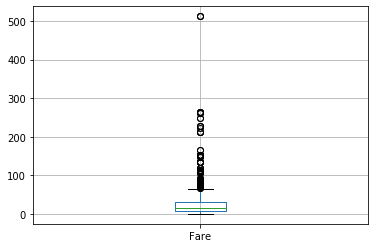

In [5]:
data.boxplot(column =['Fare'])


#We have several outliers on fare with a high price.


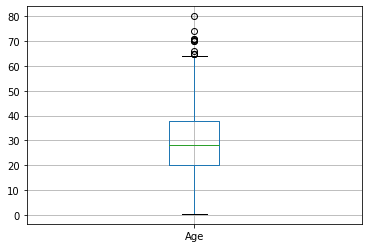

In [6]:
data.boxplot(column =['Age'])
 
#We have some outliers on age with old ages.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CEBCA84C8>,
      dtype=object)

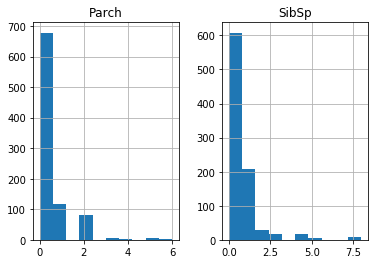

In [7]:
data.hist(column = ['SibSp', 'Parch'])


#Most people don't have a family member with them.


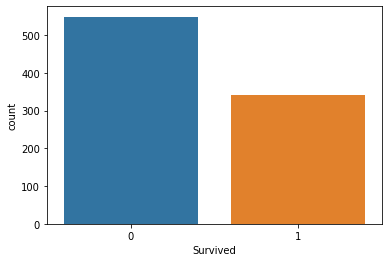

In [8]:
sns.countplot(x='Survived', data=data);

In [9]:
print("Base Survival Rate: ", data.Survived.sum()/data.Survived.count())

Base Survival Rate:  0.3838383838383838


In [10]:
print("Probability of men survived: " , data[data.Sex == 'male'].Survived.sum()/data[data.Sex == 'male'].Survived.count())
print("Probability of women survived: " , data[data.Sex == 'female'].Survived.sum()/data[data.Sex == 'female'].Survived.count())

Probability of men survived:  0.18890814558058924
Probability of women survived:  0.7420382165605095


In [11]:
print("Probability of survival by Passenger Class") 
print("Pclass=1 : ", data.Survived[data.Pclass == 1].sum()/data[data.Pclass == 1].Survived.count())
print("Pclass=2 : ", data.Survived[data.Pclass == 2].sum()/data[data.Pclass == 2].Survived.count())
print("Pclass=3 : ", data.Survived[data.Pclass == 3].sum()/data[data.Pclass == 3].Survived.count())

# Higher the passenger class is, higher the survival probability

Probability of survival by Passenger Class
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


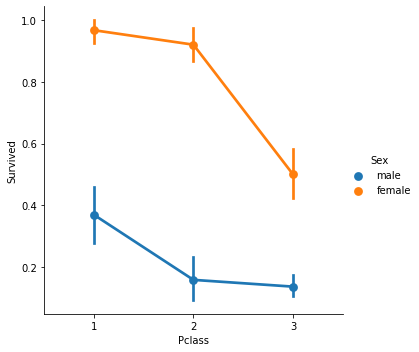

In [12]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=data);

# Gender and passenger class combination

# It is almost guarenteed to survive if the passenger is female with first passenger class

# It is almost guarenteed to die if the passenger is male with third passenger class


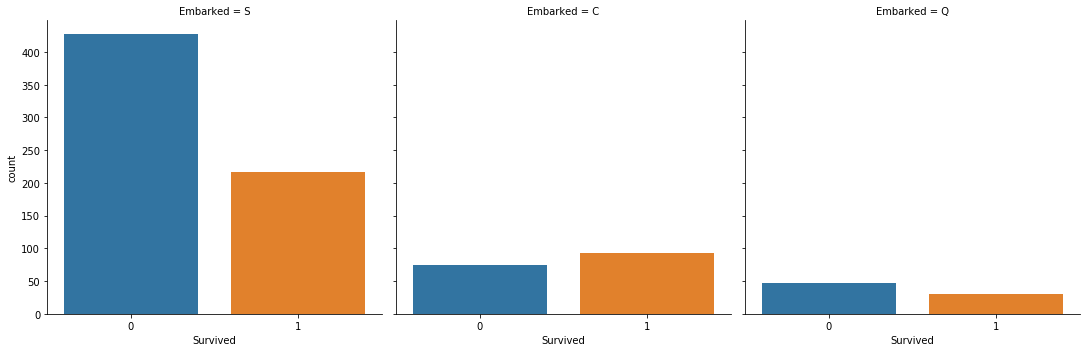

In [13]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data);


In [14]:
print("Probability of survival by Embarkation Port") 
print("Southampton : ", data.Survived[data.Embarked == 'S'].sum()/data[data.Embarked == 'S'].Survived.count())
print("Cherbourg : ", data.Survived[data.Embarked == 'C'].sum()/data[data.Embarked == 'C'].Survived.count())
print("Queenstown : : ", data.Survived[data.Embarked == 'Q'].sum()/data[data.Embarked == 'Q'].Survived.count())

# Passengers embarked from the Cherbourg port clearly have the highest survival rate
# Passengers embarked from the Southampton port clearly have the lowest survival rate

Probability of survival by Embarkation Port
Southampton :  0.33695652173913043
Cherbourg :  0.5535714285714286
Queenstown : :  0.38961038961038963


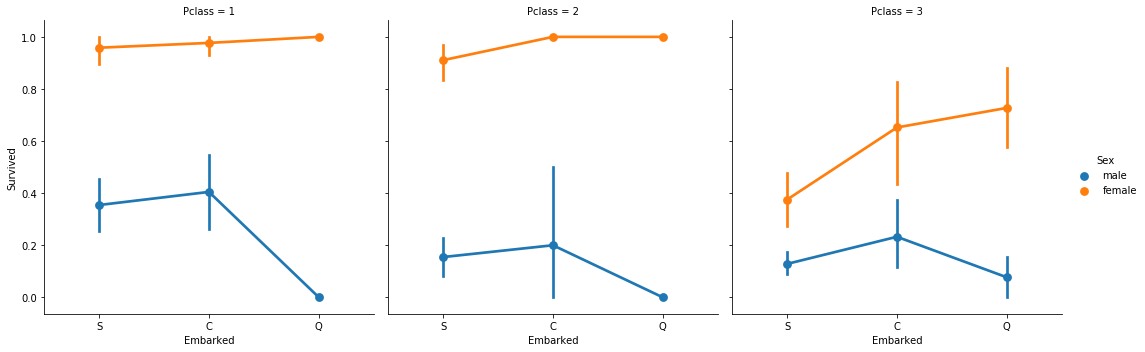

In [15]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=data);

# Combination of significant features: Embarkation port, Passenger Class and Sex.


In [16]:
pd.crosstab([data.Sex, data.Survived], [data.SibSp, data.Pclass], margins=True)

# The higher the sibbling/spouse number is the less likely the passenger will survive

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

In [17]:
pd.crosstab([data.Sex, data.Survived], [data.Parch, data.Pclass], margins=True)
# Similar to the sibbling spouse analysis. 
# The higher the children/parent number is the less likely the passenger will survive

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

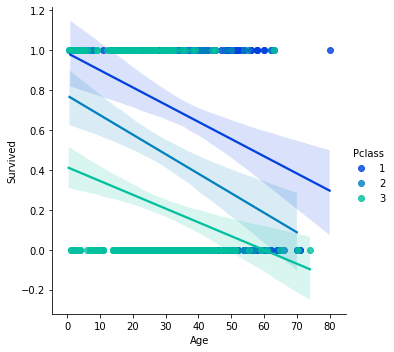

In [19]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=data, palette='winter', hue_order=range(1,4))


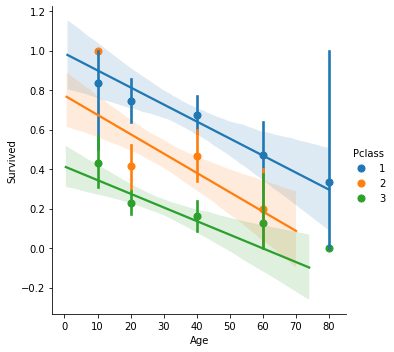

In [20]:
ageGroups = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=data,x_bins=ageGroups, hue_order=[1,2,3])

# Passenger class and age have big impact on survival.

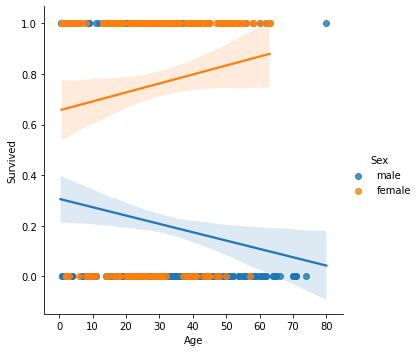

In [22]:
sns.lmplot('Age', 'Survived', data=data, hue='Sex')
# Older males have less chance to survive. Older females have higher chance to survive.


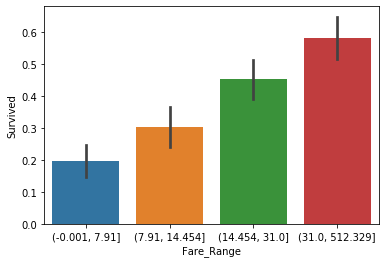

In [28]:


# 4 categories of Ticket Price
data['Fare_Range'] = pd.qcut(data['Fare'], 4) 
   
sns.barplot(x ='Fare_Range', y ='Survived',  
data = data)

#Finally we are also observing that higher the fare is higher the survival rate.